In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df=pd.read_csv(r"C:\Users\niyat\Desktop\HATE SPEECH DETECTION\twitter_data(2).csv")
test_data = df[11000:].copy()
data = df[:11000].copy()

In [3]:
df = pd.read_csv(r"C:\Users\niyat\Desktop\HATE SPEECH DETECTION\twitter_data(2).csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,Class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
data.isnull().values.any()

False

In [5]:
def tweet_processing(raw_tweet):
    letters_only=re.sub("[^a-zA-Z]"," ",raw_tweet)
    words=letters_only.lower().split()
    stops=set(stopwords.words("english"))
    m_w=[w for w in words if not w in stops]
    return (" ".join(m_w))

In [7]:
num_tweets=data["tweet"].size
clean_tweet=[]
for i in range(0,num_tweets):
    clean_tweet.append(tweet_processing(data["tweet"][i]))
data["tweet"]=clean_tweet 


num_tweets_test=test_data["tweet"].size
clean_tweet_test=[]
for i in range(num_tweets,num_tweets+num_tweets_test):
    clean_tweet_test.append(tweet_processing(test_data["tweet"][i]))
test_data["tweet"]=clean_tweet_test

In [9]:
X_train, X_test_svm, Y_train, Y_test_svm = train_test_split(df.tweet, df.Class, test_size=0.2)


In [10]:
vectorizer=CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 5000)

train_data_features=vectorizer.fit_transform(X_train)
train_data_features=train_data_features.toarray()

test_data_features=vectorizer.transform(X_test_svm)
test_data_features=test_data_features.toarray()

In [18]:
clf=svm.SVC(kernel='linear',C=1.0)
print ("Training")
clf.fit(train_data_features,Y_train)

print ("Testing")
predicted=clf.predict(test_data_features)
accuracy=np.mean(predicted==Y_test_svm)
print ("Accuracy: ",accuracy*100)

Training
Testing
Accuracy:  88.78353843050232


In [13]:
from sklearn.metrics import precision_recall_fscore_support
score_svm=precision_recall_fscore_support(Y_test_svm, predicted, average='weighted')
print(score_svm)

(0.88614582951811, 0.8878353843050232, 0.8869009948883574, None)


<Axes: xlabel='Class', ylabel='count'>

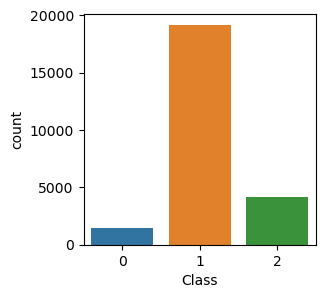

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
sns.countplot(x='Class' , data = df)

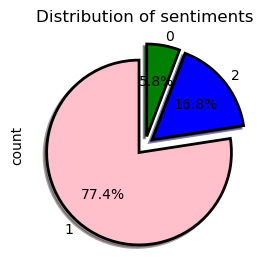

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3, 3))
colors = ("pink", "blue","green")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = df['Class'].value_counts()
explode = tuple([0.1] * len(tags)) 
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)
plt.title('Distribution of sentiments')
plt.show()